# King County House Sales Analysis

Jonathan Bardey

## Objective

The objective of this project is to develop a predictive model for housing prices in King County, Washington given the provided dataset of home sales and features from 2014-2015.   We will use the OSEMN Data Science workflow of Obtain, Scrub, Explore Model and Interpret the data.

## Step 1: Obtain

In [1]:
#Import necessary libraries
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data into a Pandas Dataframe
df = pd.read_csv('kc_house_data.csv')

#Inspect the first 5 rows of the dataset and column information.
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

Our data shows 21597 entries representing houses sold in King County, WA from 2014-2015.  There are 21 columns of home characteristics including our Targer variable: price.  We will take a look at the Column names and descriptions below before beginning our investigation.

### Data Column Names and Descriptions

* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathroomsr** -  of bathrooms/bedrooms
* **sqft_livinge** -  footage of the home
* **sqft_lots** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Step 2: Scrubbing the Data

In this step we will look at each column/feature of the dataset, ensuring that each has useful information for our project.  Missing values and outliers will be accounted for, and we will ensure that all data is cast to the proper type.

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#Check dataframe for Null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The 'waterfront', 'view' and 'yr_renovated' columns contain null values which will be addressed below.

### 2a. Column 'id':

While useful in indentifying the properties in the dataset, the 'id' column will not help in our pricing analysis.  We will drop the column.

In [5]:
#Dropping 'id'column:
df.drop('id', axis = 1, inplace = True)
#Verifying change to dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 2b. Column 'date':

We will change the 'date' column from object(string) type to datetime and inspect the values.

In [6]:
df.date = pd.to_datetime(df.date)
display(df.date.max())
display(df.date.min())

Timestamp('2015-05-27 00:00:00')

Timestamp('2014-05-02 00:00:00')

Our home sales dates range from May 2, 2014 to May 27, 2015.  

### 2c. Column 'price':

Price will serve as our target or dependent variable.  The column contains no null values.  

In [7]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

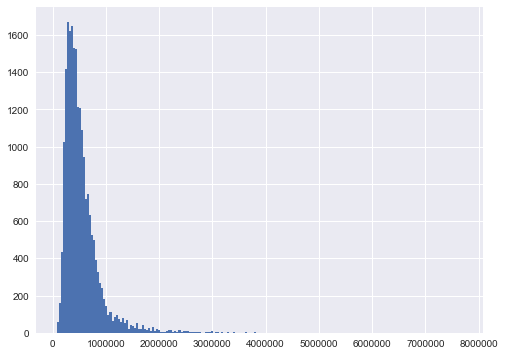

In [8]:
df.price.hist(bins = 200, figsize=(8,6))

Note some positive skew due to some expensive outliers.   Let's examine a bit further.

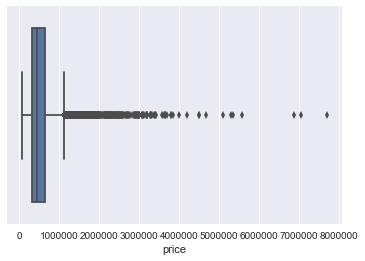

In [9]:
sns.boxplot(df.price)

The large majority of the homes are priced less than 1 million dollars with outliers all the way out to 7.7 million.  We want to remove some of the outliers which will throw off our model.  From the boxplot it appears there are still a decent concentration of homes up until about the 3 million price level.

In [10]:
#How many properties have a sale price more than $3 million? 
df.loc[df.price > 3000000].shape[0]

45

In [11]:
#Drop rows with price greater than $3 million.
df = df[df['price'] < 3000000]

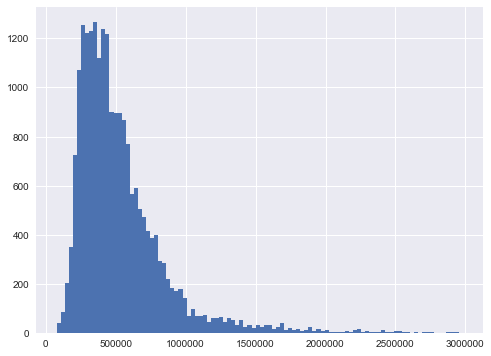

In [12]:
#Visualizing after dropping outliers
df.price.hist(bins = 100, figsize=(8,6))

Still exhibits some positive skew which we will address by log transforming later.

### 2d. Column 'bedrooms':

In [13]:
#Check unique values of bedrooms
df.bedrooms.value_counts()

3     9815
4     6870
2     2759
5     1580
6      266
1      196
7       37
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Bedroom data looks ok except for the 33 bedroom entry.  Let's take a closer look.

In [14]:
#Checking some summary statistics which show the max outlier.
df.bedrooms.describe()

count    21546.000000
mean         3.370370
std          0.923896
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [15]:
#Checking the median bedrooms for the dataset.
df.bedrooms.median()

3.0

In [16]:
#Inspecting the row for the house with an entry of 33 bedrooms.
df.loc[df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


The rest of the data for this house looks good, but clearly 33 bedrooms is an error for a house with 1620 square feet.  Let's replace the value with '3' which is the median number of bedrooms, and quite likely the intended value for this house.

In [17]:
df.bedrooms.loc[15856] = 3

In [18]:
#Checking that the change took place.
df.bedrooms.loc[15856]

3

In [19]:
df.bedrooms.describe()

count    21546.000000
mean         3.368978
std          0.901576
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

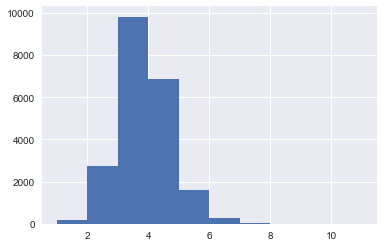

In [20]:
#Visualizing the distribution of Bedrooms with that outlier removed.
df.bedrooms.hist()

Looks like a nice fairly normal distribution around a mean of 3.35 bedrooms.  

### 2e. Column 'bathrooms':

In [21]:
#Checking value counts for bathrooms
df.bathrooms.value_counts().sort_index()

0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3047
2.00    1930
2.25    2047
2.50    5376
2.75    1185
3.00     750
3.25     583
3.50     726
3.75     151
4.00     132
4.25      75
4.50      96
4.75      21
5.00      17
5.25      11
5.50       7
5.75       3
6.00       3
6.25       1
6.50       2
6.75       1
7.50       1
8.00       1
Name: bathrooms, dtype: int64

In [22]:
#Check summary statistics for number of bathrooms:
df.bathrooms.describe()

count    21546.000000
mean         2.110380
std          0.759241
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

As seen above bathrooms are measured to the 0.25, based on combination of toilets/sinks/showers/tubs.  The data is properly stored as float and there are no missing or null values.

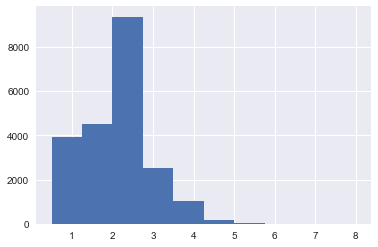

In [23]:
#Visualizing the distribution of bathrooms.
df.bathrooms.hist()

### 2f. Columns 'sqft_living', 'sqft_lot: 

These two columns are properly stored as ints with no missing values.  Let's take a look at their distributions:

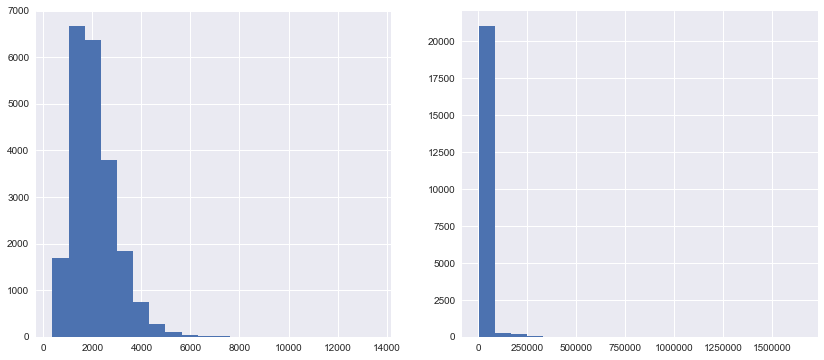

In [24]:
#Visualizing the distributions of sqft_living and sqft_lot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
df.sqft_living.hist(bins=20, ax=axes[0])
df.sqft_lot.hist(bins=20, ax=axes[1])
plt.show()


## 2g. Column 'floors'

In [25]:
df.floors.dtype

dtype('float64')

Floors are stored as a 'float' type likely indicating the presence of non-integer floor values.  Let's inspect.

In [26]:
df.floors.value_counts()

1.0    10662
2.0     8203
1.5     1909
3.0      610
2.5      156
3.5        6
Name: floors, dtype: int64

From checking the value counts, it appears 0.5 number scheming of floors is sufficiently common, likely indicating mezzanines or lofts.  There are no missing values and it is fine to leave the floors data as is.

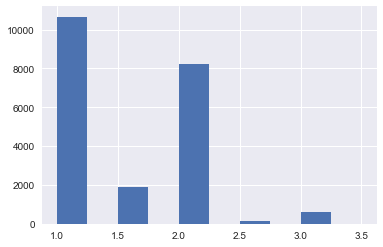

In [27]:
#Visualizing the distribution of floors.
df.floors.hist()
plt.show()

### 2h. Column 'waterfront':

A couple issues with this column.  There are missing values and it should be a boolean rather than float.

In [28]:
#Checking datatype
df.waterfront.dtype

dtype('float64')

In [29]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [30]:
df.waterfront.value_counts()

0.0    19047
1.0      124
Name: waterfront, dtype: int64

In [31]:
#of non-null values, how many are on the water?
on_water = 124 / (19047+124)

In [32]:
print(f'There are {df.waterfront.isna().sum()} null values in the waterfront column.')
print(f'Of non-null values {round(on_water * 100,2)}% are on the water.')

There are 2375 null values in the waterfront column.
Of non-null values 0.65% are on the water.


Considering that over 99% of houses are not on the water, and figuring that owners or realtors of any house on the water would be very clear about that feature, we shall convert null values to 0 (the column median and mode). 

In [33]:
#Replace missing values with 0.
df.waterfront.fillna(0, inplace=True)

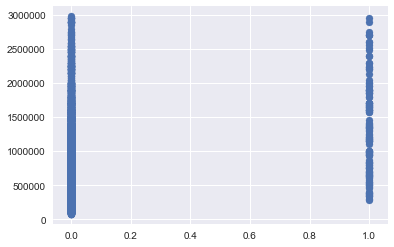

In [34]:
#Quick visualization of housing prices for homes based on waterfront.
plt.scatter(df.waterfront, df.price)
plt.show()

The scatter plot of waterfront vs price shows the full range of house prices whether or not the house is on the water for our remaining dataset.  With only 0.65% true values for waterfront, this column will not be useful for our model.

In [35]:
#Drop the waterfront column
df= df.drop(['waterfront'], axis=1) 

### 2i. Column 'view':

This column shows if and how many times the house has been viewed.  We will address null values.

In [36]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [37]:
df.view.value_counts()

0.0    19407
2.0      953
3.0      506
1.0      328
4.0      290
Name: view, dtype: int64

In [38]:
no_views = 19407 / (19407 + 953 + 506 + 328 + 290)

In [39]:
print(f'Of non-null values {round(no_views * 100,2)}% have not been viewed.')
print(f'There are {df.view.isna().sum()} null values.')

Of non-null values 90.33% have not been viewed.
There are 62 null values.


A majority of homes in the dataset have not been viewed and we will replace the small amount of null values with the column mode of 0.

In [40]:
#Replacing the null values
df.view.fillna(0, inplace=True)
df.view.value_counts()

0.0    19469
2.0      953
3.0      506
1.0      328
4.0      290
Name: view, dtype: int64

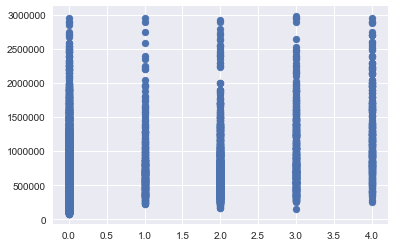

In [41]:
#Quick visualization of housing prices for homes based on views.
plt.scatter(df.view, df.price)
plt.show()

### 2j. Column 'condition':

In [42]:
display(df.condition.unique())
display(df.condition.value_counts())

array([3, 5, 4, 1, 2], dtype=int64)

3    13987
4     5664
5     1696
2      170
1       29
Name: condition, dtype: int64

We have a 1-5 scale for how good the condition of the house is.  No null values, no issues with this data.

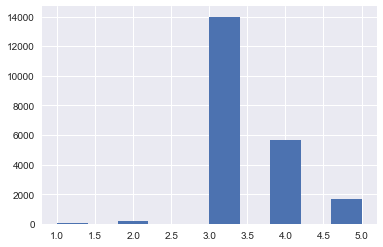

In [43]:
#Visualizing the distribution of condition.
df.condition.hist()
plt.show()

### 2k. Column 'grade':

In [44]:
display(df.grade.unique())
display(df.grade.value_counts())

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

7     8974
8     6064
9     2615
6     2038
10    1127
11     380
5      242
12      71
4       27
13       7
3        1
Name: grade, dtype: int64

Similar to 'condition' but values range from 3 to 13.  So it is likely a 1-15 scale, assigned by King County, with no extreme values.  Data looks fine we will just take a look at the distribution.

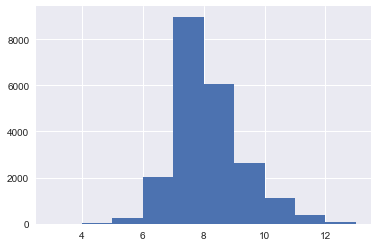

In [45]:
#Visualizing the distribution of condition.
df.grade.hist()
plt.show()

### 2l. Column 'sqft_above'

This column shows the square footage of the house above ground (apart from the basement).  The data is properly stored as int and there are no missing values.  

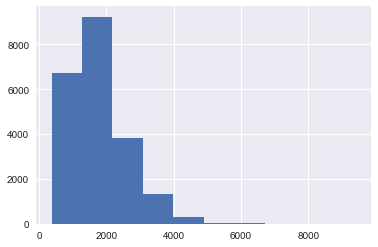

In [46]:
df.sqft_above.hist()
plt.show()

### 2m.  Column 'sqft_basement':

In [47]:
df.sqft_basement.describe()

count     21546
unique      294
top         0.0
freq      12817
Name: sqft_basement, dtype: object

Unlike the rest of the square footage columns, this one is an 'object' datatype instead of integer.  Let's explore further.

In [48]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [49]:
#Obviously '?' is concerning but let's check the type of a numerical value as well
type(df.sqft_basement[1])

str

In [50]:
df.sqft_basement.value_counts()[:5]

0.0      12817
?          453
600.0      216
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [51]:
print(f'Of known values, {round(sum(df.sqft_basement == "0.0")/((len(df) - 454)) * 100, 2)}% of houses have no basement.')

Of known values, 60.77% of houses have no basement.


The second most common entry is '?' and we will go ahead and replace that with the column mode of '0'. It seems likely that if presense of a basement if questionable, there is no basement.

In [52]:
#Replacing '?' with '0'
df.sqft_basement = df.sqft_basement.replace('?', 0)
#Cast to integer
df.sqft_basement = df.sqft_basement.astype('float').astype('int')
df.sqft_basement.value_counts()[:5]

0      13270
600      216
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

I want to confirm a suspicion that sqft_living is equal to sqft_above and sqft_basement:

In [53]:
living = df.sqft_living
above_plus_basement = df.sqft_above + df.sqft_basement
pd.concat([living, above_plus_basement], axis=1).transpose()

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
0,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020


Ok so that assumption checks out, therefore the information included in the sqft_above and sqft_basement columns is included in sqft_living and will likely create multicollinearity issues if left alone.  More interesting may be to see if the presence of a basement on its own has an effect on housing price.  Therefore we will transform it into a boolean datatype, 0 if no basement, 1 if it has a basement.

In [54]:
df.loc[df["sqft_basement"] == 0, "basement"] = "0"
df.loc[df["sqft_basement"] != 0, "basement"] = "1"

In [55]:
df.basement.value_counts()

0    13270
1     8276
Name: basement, dtype: int64

In [56]:
#Copy in case we need to add the column back in
sqft_basement = df.sqft_basement

In [57]:
#dropping 'sqft_basement' column
df.drop('sqft_basement', axis = 1, inplace = True)

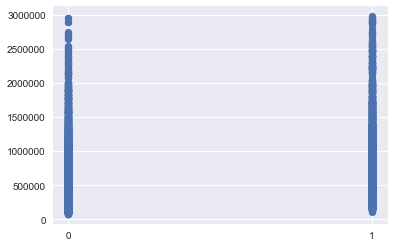

In [58]:
#Visualization of housing prices based on presence of a basement.
plt.scatter(df.basement, df.price)
plt.show()

### 2n. Column 'yr_built':

In [59]:
#Preview some summary statistics of the column.
df.yr_built.describe()

count    21546.000000
mean      1970.975680
std         29.361885
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

We have a column of float types, showing the year the home was built.  No missing values.

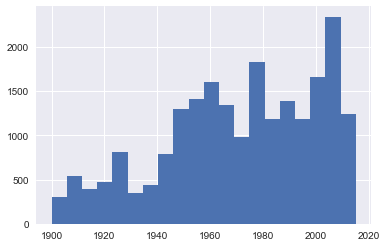

In [60]:
#Visualizing the distribution of 'yr_built'.
df.yr_built.hist(bins=20)
plt.show()

### 2o. Column 'yr_renovated':

This column shows the year the house was renovated.

In [61]:
#Previeiwing summary statistics
df.yr_renovated.describe()

count    17711.000000
mean        82.940828
std        398.346057
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [62]:
#We see only 17,711 entries in the column, how many null values?
df.yr_renovated.isna().sum()

3835

In [63]:
#Check value counts 
df.yr_renovated.value_counts()

0.0       16975
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       20
1989.0       20
2006.0       20
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2002.0       15
1983.0       15
2015.0       14
1994.0       14
2008.0       14
2001.0       14
2010.0       14
1986.0       14
1985.0       14
1992.0       13
1993.0       12
1987.0       12
1997.0       12
1995.0       12
          ...  
1964.0        5
1975.0        5
1969.0        4
1965.0        4
1973.0        4
1963.0        4
1981.0        4
1956.0        3
1978.0        3
1960.0        3
1958.0        3
1945.0        3
1955.0        3
1972.0        3
1957.0        2
1940.0        2
1962.0        2
1974.0        2
1967.0        2
1954.0        1
1934.0        1
1944.0        1
1976.0        1
1959.0        1
1950.0        1
1953.0        1
1946.0        1
1951.0        1
1971.0        1
1948.0        1
Name: yr_renovated, Leng

We will assume any houses with a 0 have not been renovated.  Let us check how many houses have never been renovated.

In [64]:
print(f'There are {df.yr_renovated.isna().sum()} null values and {sum(df.yr_renovated == 0.0)} zero values. ')

There are 3835 null values and 16975 zero values. 


In [65]:
print(f'Only {round((1 - (3835 + 16975) / len(df)) * 100, 2)}% of houses have been renovated.')

Only 3.42% of houses have been renovated.


Not enough values in this column for it to be useful so we drop the yr_renovated column.

In [66]:
#Drop the yr_renovated column
df= df.drop(['yr_renovated'], axis=1) 

### 2p. Column 'zipcode'

In [67]:
df.zipcode.describe()

count    21546.000000
mean     98078.023670
std         53.501409
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

This column has been entered as a float, but represents zip codes where the houses are located.  This should be categorical data which can later be one hot encoded.  There are no missing values.

In [68]:
df.zipcode = df.zipcode.astype("str")

In [69]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    542
98118    507
98023    499
98006    496
98133    493
98059    468
98058    455
98155    445
98074    440
98033    430
98027    412
98125    409
98056    405
98053    403
98001    361
98075    358
98126    354
98092    351
98144    342
98106    335
98116    330
98029    321
98199    316
98065    308
        ... 
98168    269
98055    268
98112    266
98107    266
98136    263
98178    262
98030    256
98177    254
98166    254
98022    233
98105    228
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    183
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    108
98102    103
98010    100
98024     80
98148     57
98039     43
Name: zipcode, Length: 70, dtype: int64

70 zip codes in King County are represented.  We can leave this data for now.

### 2q. Columns 'lat', 'long':

Latitude and Longitude of the house would provide interesting data to be explored in the future but at this point it is out of the scope of our exploration.

In [70]:
#dropping lat and long columns.
df.drop(['lat', 'long'], axis = 1, inplace=True)

### 2r. Columns 'sqft_living15', 'sqft_lot15':

These columns show the square fit living and lot information of the 15 closest neighboring houses.  We will take a quick look at summary statistics.

In [71]:
df.sqft_living15.describe()

count    21546.000000
mean      1982.596584
std        680.277144
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [72]:
df.sqft_lot15.describe()

count     21546.000000
mean      12744.017312
std       27300.556848
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10069.750000
max      871200.000000
Name: sqft_lot15, dtype: float64

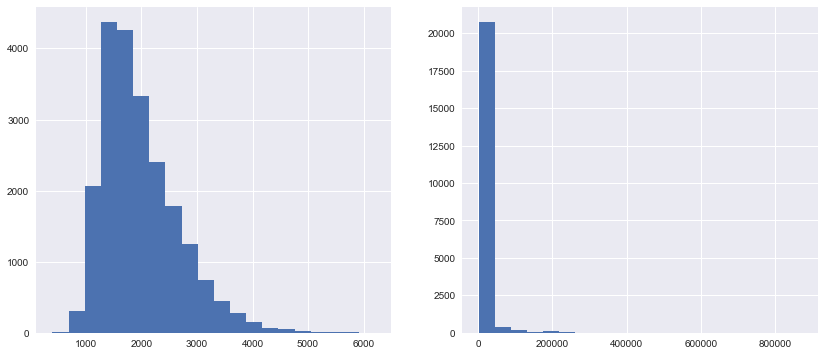

In [73]:
#Visualizing the distributions of sqft_living15 and sqft_lot15
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
df.sqft_living15.hist(bins=20, ax=axes[0])
df.sqft_lot15.hist(bins=20, ax=axes[1])
plt.show()

These histograms look an awfully lot like the ones for 'sqft_living' and 'sqft_lot'.  It would make sense that neighborhoods have similarly sized houses close to each other.  We will further explore the multicollinearity below.

In [74]:
#Let's take a look at our dataframe after addressing each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21546 entries, 0 to 21596
Data columns (total 16 columns):
date             21546 non-null datetime64[ns]
price            21546 non-null float64
bedrooms         21546 non-null int64
bathrooms        21546 non-null float64
sqft_living      21546 non-null int64
sqft_lot         21546 non-null int64
floors           21546 non-null float64
view             21546 non-null float64
condition        21546 non-null int64
grade            21546 non-null int64
sqft_above       21546 non-null int64
yr_built         21546 non-null int64
zipcode          21546 non-null object
sqft_living15    21546 non-null int64
sqft_lot15       21546 non-null int64
basement         21546 non-null object
dtypes: datetime64[ns](1), float64(4), int64(9), object(2)
memory usage: 3.4+ MB


## Step 3: Exploring Our Data

Now that we have scrubbed our data we shall begin to further explore the relationship between our features and house sales, as well as multicollinearity that may exist between the variables.  The Exploring process will naturally lead us into doing further scrubbing of the data and sort of blend the two parts of the overall process together.

###  Question: What effect does the date have on housing sales?

**First we will look at house sales by month for our dataset.**

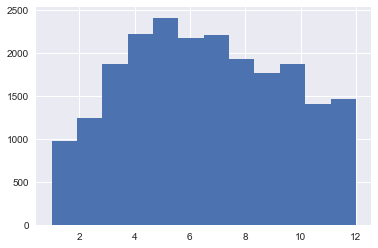

In [75]:
#Initial visualization
df.date.dt.month.hist(bins=12)

Let's clean this up.

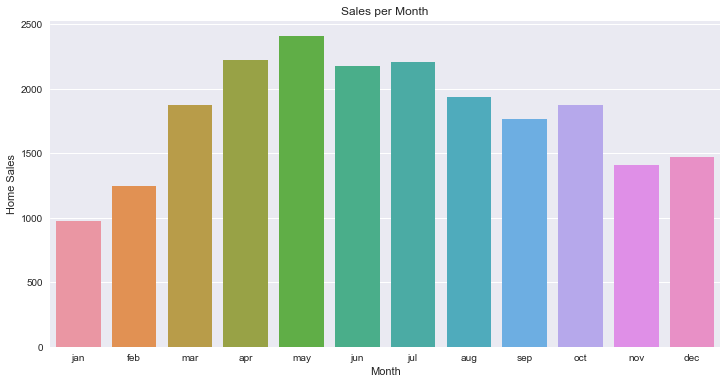

In [76]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sales_per_month = []
for i in range(1,13):
    sales_per_month.append(sum(df.date.dt.month == i))

plt.figure(figsize=(12,6))

sns.barplot(months, sales_per_month)
plt.xlabel("Month")
plt.ylabel("Home Sales")
plt.title("Sales per Month")
plt.show()
    

In [77]:
#checking for min and max (first/last) values for the date of home sales
df.date.describe()

count                   21546
unique                    372
top       2014-06-23 00:00:00
freq                      141
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

The highest number of sales in our chart appear in May, however based on looking at the first and last dates included in the column, May is the only month in which we have data for both 2014 and 2015 which skews that value.  Overall, the data shows a sweet spot of March through August for housing sales with clearly lower sales in the winter months.

**Next we will compare average sale price by month.**

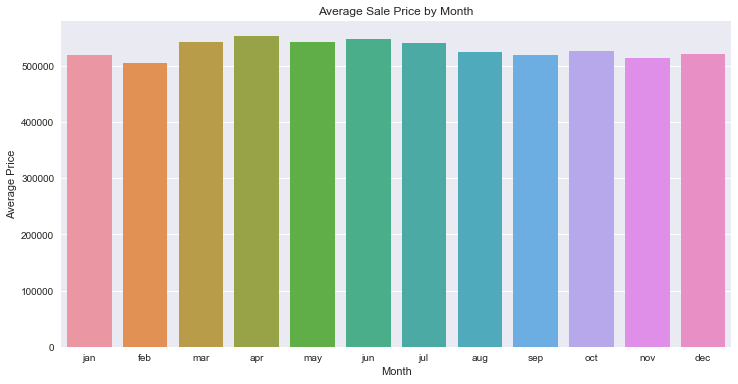

In [78]:
average_sale_price_per_month = []

for i in range(1,13):
    average_sale_price_per_month.append(np.mean(df.price[df.date.dt.month == i]))
average_sale_price_per_month
    
plt.figure(figsize=(12,6))
sns.barplot(months, average_sale_price_per_month)
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Sale Price by Month")
plt.show()

This chart is not quite as interesting.  Average prices are fairly evenly spaced.  April appears to have had the highest average value and most houses sold.  Future work could look into if there were specific economic factors in April 2014 that contributed, and if this was a local, regional or national effect.  

**With our work on the effect of date on sales and prices finished we will drop the date column as it will not be relevant for our model.**

In [79]:
#dropping the date column 
df = df.drop('date', axis = 1)

## Exploring Features and Relationships

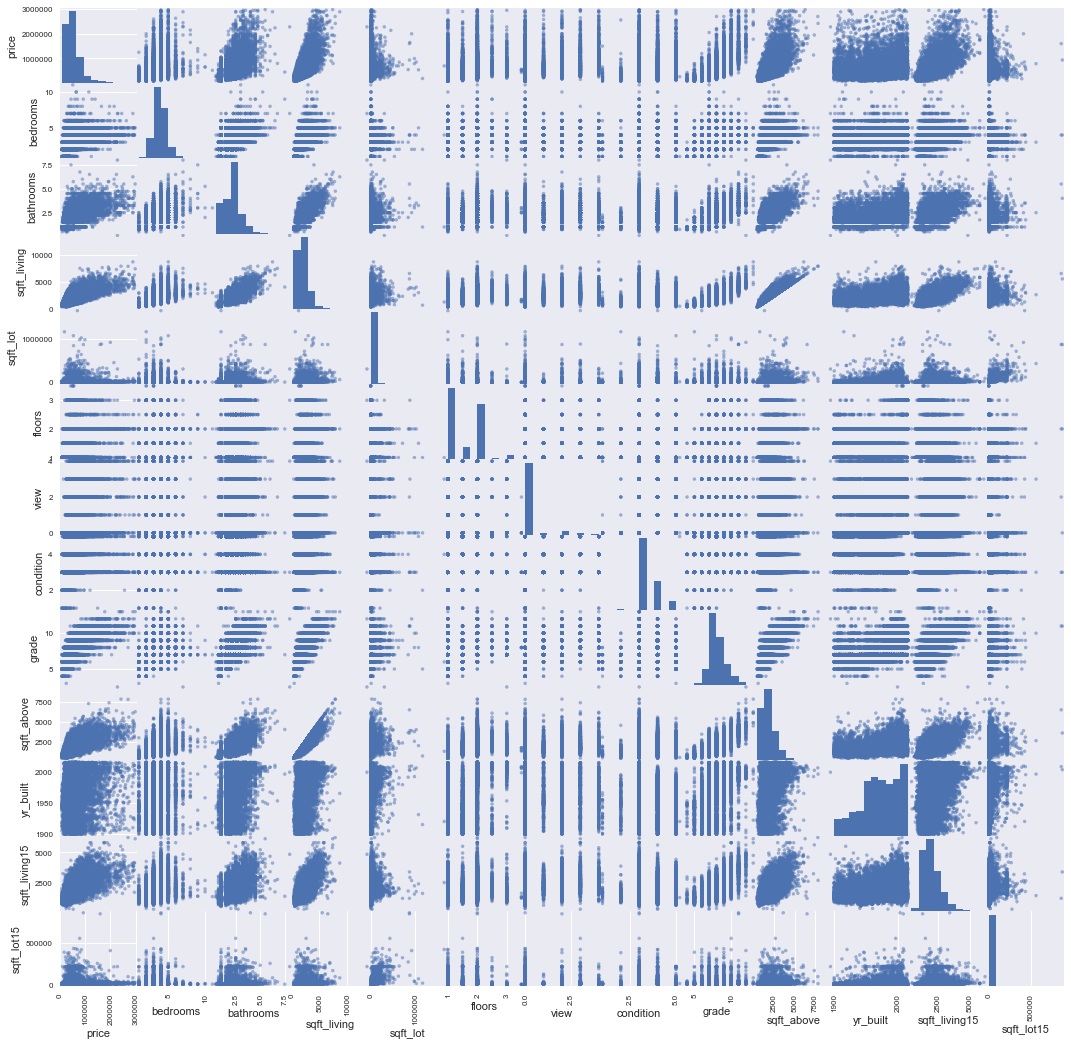

In [80]:
#plotting a scatter matrix
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()

In [81]:
#Checking for collinearity
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.321863,0.518968,0.691017,0.095983,0.271264,0.380040,0.040131,0.680779,0.597700,0.053119,0.602008,0.087166
bedrooms,0.321863,1.000000,0.525194,0.595388,0.033339,0.181357,0.076003,0.022291,0.361300,0.490198,0.161796,0.401279,0.031601
bathrooms,0.518968,0.525194,1.000000,0.750212,0.088216,0.505072,0.172681,-0.128367,0.659148,0.678976,0.512330,0.563878,0.087820
sqft_living,0.691017,0.595388,0.750212,1.000000,0.176298,0.355911,0.265002,-0.061532,0.757973,0.873182,0.324593,0.756607,0.187249
sqft_lot,0.095983,0.033339,0.088216,0.176298,1.000000,-0.004918,0.074780,-0.008780,0.114825,0.185975,0.052852,0.144971,0.718169
floors,0.271264,0.181357,0.505072,0.355911,-0.004918,1.000000,0.025304,-0.265565,0.459737,0.526832,0.491024,0.279144,-0.010916
view,0.380040,0.076003,0.172681,0.265002,0.074780,0.025304,1.000000,0.044958,0.235523,0.149973,-0.058245,0.269031,0.072246
condition,0.040131,0.022291,-0.128367,-0.061532,-0.008780,-0.265565,0.044958,1.000000,-0.149240,-0.162135,-0.361218,-0.094156,-0.002921
grade,0.680779,0.361300,0.659148,0.757973,0.114825,0.459737,0.235523,-0.149240,1.000000,0.751320,0.451493,0.709647,0.120832
sqft_above,0.597700,0.490198,0.678976,0.873182,0.185975,0.526832,0.149973,-0.162135,0.751320,1.000000,0.429882,0.730211,0.196754


In [82]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.691017
grade            0.680779
sqft_living15    0.602008
sqft_above       0.597700
bathrooms        0.518968
view             0.380040
bedrooms         0.321863
floors           0.271264
sqft_lot         0.095983
sqft_lot15       0.087166
yr_built         0.053119
condition        0.040131
Name: price, dtype: float64

We took a quick look at a table of correlation values, and then ordered the columns by their correlation with price.  Square foot living and grade are the two features with the highest correlation with our target variable price.  Now let's take a better look at a correlation heat map and address some issues we may have with multicollinearity.

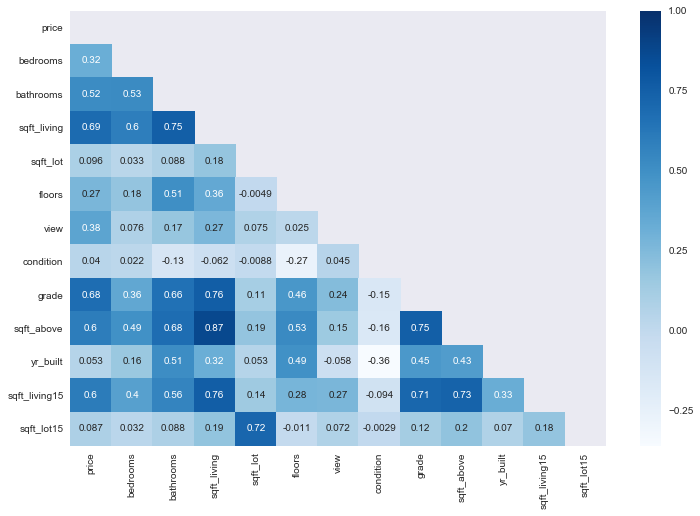

In [83]:
#Drawing heat map
plt.figure(figsize=(12,8))
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap="Blues")
plt.show()

There is a good amount of collinearity among our features.  The highest pair with 0.87 is sqft_living with sqft_above.  In fact there is a lot of collinearity between several of our square footage measures.  Let's explore this a bit further by looking at the relationship between each of them and price.

### Square Footage Features vs Price:

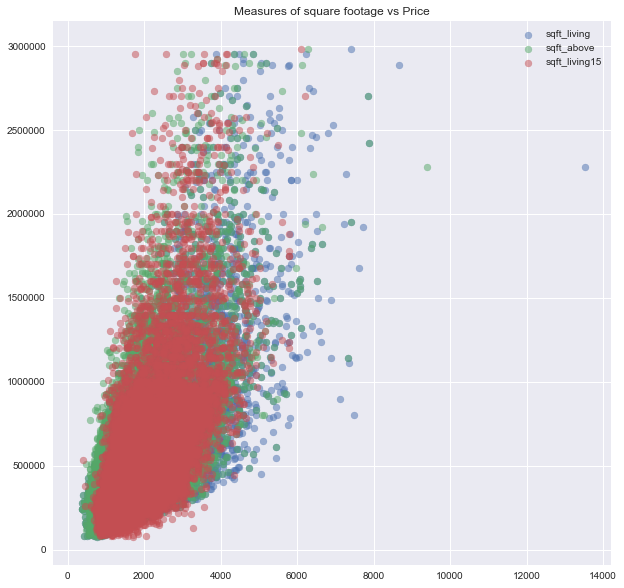

In [84]:
#Visualize relationship between different square footage measurements and price
plt.figure(figsize=(10,10))
plt.scatter(df.sqft_living, df.price, alpha=0.5, label='sqft_living')
plt.scatter(df.sqft_above, df.price, alpha=0.5, label='sqft_above')
plt.scatter(df.sqft_living15, df.price, alpha=0.5, label='sqft_living15')
plt.title("Measures of square footage vs Price")
plt.legend()
plt.show()

There is plenty of overlap in these values and choosing sqft_living to represent them all will help reduce multicollinearity.  Let's also look at the same thing for the square foot lot measures.

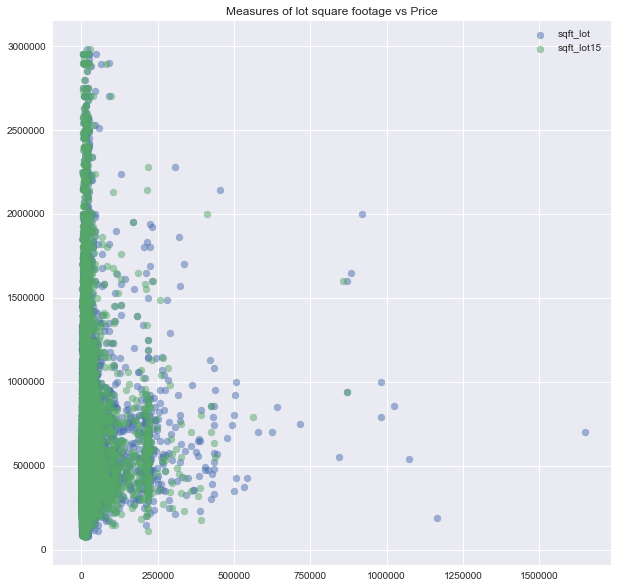

In [85]:
#Visualize relationship between lot square footage measurements and price
plt.figure(figsize=(10,10))
plt.scatter(df.sqft_lot, df.price, alpha=0.5, label='sqft_lot')
plt.scatter(df.sqft_lot15, df.price, alpha=0.5, label='sqft_lot15')
plt.title("Measures of lot square footage vs Price")
plt.legend()
plt.show()

   Again, a lot of overlap here.    Let's drop the sqft_lot15 column as well, further reducing multicollinearity.  The correlation between the two is 0.72 which is not over the threshold of 0.75 but we do not need two such similar features in our model.   This will leave us with sqft_living and sqft_lot as square footage features to include in our model.

In [86]:
#Dropping extra square footage categories
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [87]:
#confirming the change took place
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,0


### Sqft_living and grade vs price

Another pair of features with correlation above our 0.75 threshold is sqft_living and grade (0.76).

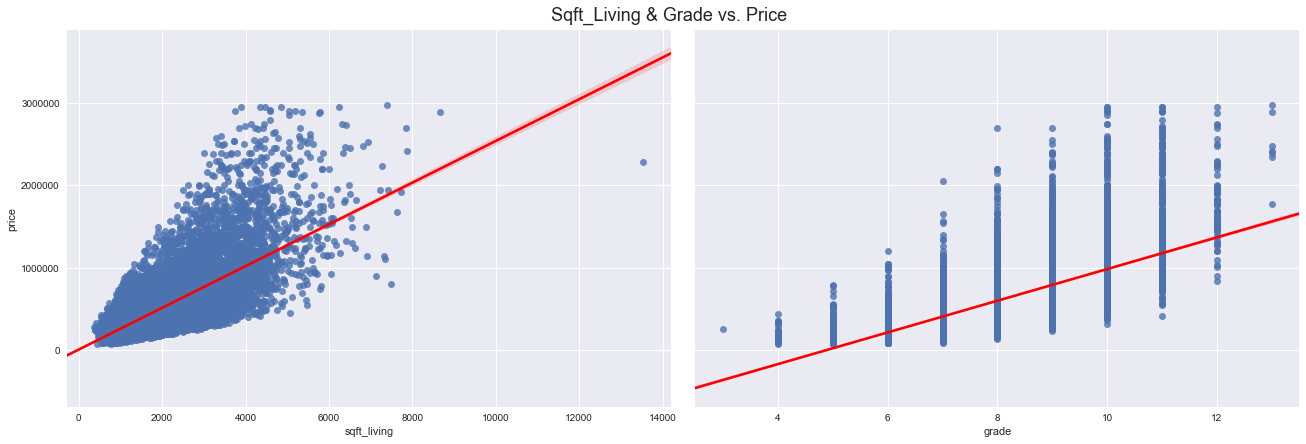

In [88]:
sns.pairplot(df, kind='reg', x_vars = ('sqft_living', 'grade'),
             y_vars="price", height=6, aspect=1.5, plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Sqft_Living & Grade vs. Price', y=1.02, fontsize=18)
plt.show()

These features have a similar impact on price and exhibit a high degree of collinearity (0.76) so we will only need 1 of them.  Because sqft_living correlates better with our target of Price, we will drop Grade.

In [89]:
#Dropping the 'grade' column
df = df.drop('grade', axis=1)

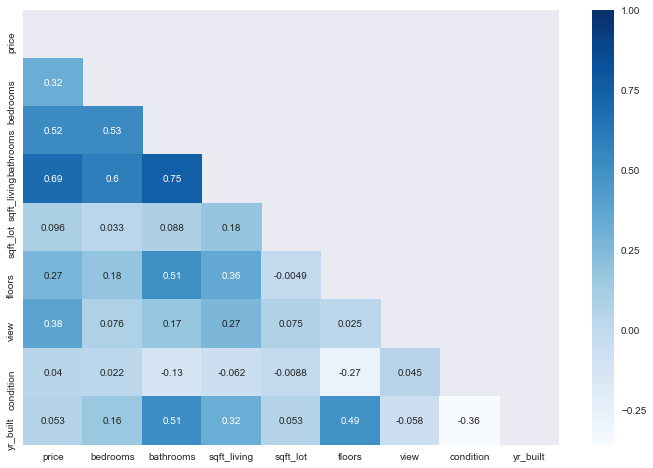

In [90]:
#One more look at our heat map:
corr2 = df.corr()

plt.figure(figsize=(12,8))
mask = np.zeros_like(corr2, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr2, mask=mask, annot=True, cmap="Blues")
plt.show()

No remaining pair of features has a correlation over 0.75.  The pair of sqft_living and bathrooms is right at the 0.75 threshold and considering that number of bathrooms can be such an important feature to homebuyers we will keep both.

###  Question: Should a seller or builder maximize bedrooms or bathrooms? 

In [91]:
#A quick re-check at some basic statistics for the columns
print(f'Bathrooms has a mean of {round(df.bathrooms.mean(),2)} and a standard deviation of {round(df.bathrooms.std(),2)}')
print(f'Bedrooms has a mean of {round(df.bedrooms.mean(),2)} and a standard deviation of {round(df.bedrooms.std(),2)}')


Bathrooms has a mean of 2.11 and a standard deviation of 0.76
Bedrooms has a mean of 3.37 and a standard deviation of 0.9


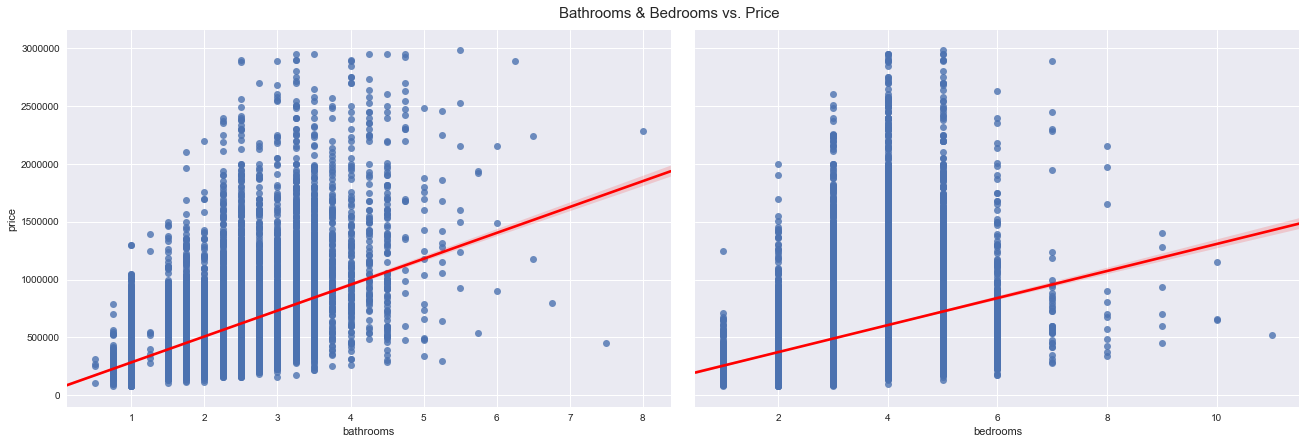

In [92]:
#Plotting bedrooms, bathrooms and floors against price
sns.pairplot(df, kind='reg', x_vars = ('bathrooms', 'bedrooms'),
             y_vars="price", height=6, aspect=1.5, plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Bathrooms & Bedrooms vs. Price', y=1.02, fontsize=15)
plt.show()

Both of our features shows a positive linear relationship with the target variable 'price'.  Now we will use statsmodels to run a simple linear regression of each feature to see which has a bigger impact.

In [93]:
#Simple regression of bathrooms vs price with a constant.
x = df.bathrooms
X = sm.add_constant(x)
y = df.price
linreg = sm.OLS(y,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     7941.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:29:11   Log-Likelihood:            -3.0081e+05
No. Observations:               21546   AIC:                         6.016e+05
Df Residuals:                   21544   BIC:                         6.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.01e+04   5634.576     10.666      0.000    4.91e+04    7.11e+04
bathrooms   2.239e+05   2512.302     89.113      0.000    2.19e+05    2.29e+05
==============================================================================
Omnibus:                    10102.092   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80973.854
Skew:                           2.093   Prob(JB):                         0.00
Kurtosis:                      11.525   Cond. No.                         7.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Simple regression of bedrooms vs price with a constant.
x = df.bedrooms
x = sm.add_constant(x)
y = df.price
linreg = sm.OLS(y,x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2490.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:29:11   Log-Likelihood:            -3.0301e+05
No. Observations:               21546   AIC:                         6.060e+05
Df Residuals:                   21544   BIC:                         6.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.386e+05   8172.537     16.964      0.000    1.23e+05    1.55e+05
bedrooms    1.169e+05   2343.364     49.898      0.000    1.12e+05    1.22e+05
==============================================================================
Omnibus:                    11294.581   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100691.047
Skew:                           2.371   Prob(JB):                         0.00
Kurtosis:                      12.469   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have seen previously that sqft_living is the single greatest predictor of housing price with its high correlation and near linear relationship viewable in the pair plot above.  If expanding a house, or deciding how to alot increased space when building a bigger one, adding additional bathrooms would appear to be the better use of resources than bedrooms. The bathroom model shows a starting price around 60,000 dollars and the price increasing by around 220,000 thousand for each new bathroom.  Obviously these models have low r-squared scores and should not be used alone to predict house prices, but it can help inform how a builder or seller may look to use available space or resources for a house.

### Question:  What does zip code tell us about house and land prices?

**First let us check what influence the zip code column as a whole has on sales price**

In [95]:
#Simple regression of zipcode vs price with a constant.
zip = df.zipcode.astype('float')
X = sm.add_constant(zip)
y = df.price
linreg = sm.OLS(y,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     46.85
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           7.87e-12
Time:                        10:29:11   Log-Likelihood:            -3.0417e+05
No. Observations:               21546   AIC:                         6.083e+05
Df Residuals:                   21544   BIC:                         6.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.85e+07   4.09e+06      6.975      0.000    2.05e+07    3.65e+07
zipcode     -285.1744     41.663     -6.845      0.000    -366.838    -203.511
==============================================================================
Omnibus:                    11650.952   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103010.330
Skew:                           2.475   Prob(JB):                         0.00
Kurtosis:                      12.500   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see with an r-squared value of 0.002, the zipcode feature taken as a whole is practically meaningless as a predictor of price.  This makes sense as the numbers of the zip code do not contain important numeric information (ie, 98100 isn't by definition bigger or better than 98000) but are instead best viewed as categories of houses.  So we will check to see what we can learn by looking at the zip codes individually, and before modeling we will one hot encode them to create a new feature for each zip code in the dataset.

**Next we will look at the top 10 zip codes for mean house price.**

In [96]:
#Creating a copy of the data set to use for this exploration of zip codes.
df_location = df.copy()

In [97]:
top_10_zips_mean = df_location.groupby('zipcode')['price'].mean().sort_values(ascending=False)[:10]

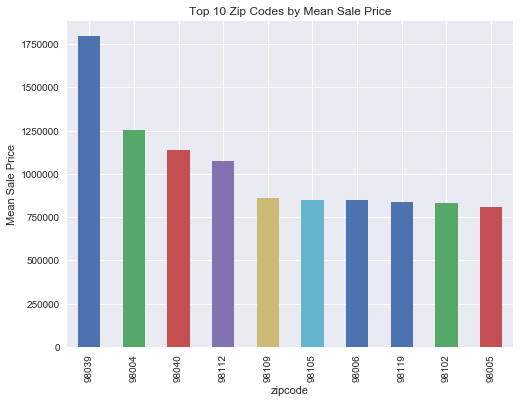

In [98]:
top_10_zips_mean.plot(kind='bar', figsize=(8,6))
plt.ylabel("Mean Sale Price")
plt.title("Top 10 Zip Codes by Mean Sale Price")
plt.show()

**And the bottom 10...**

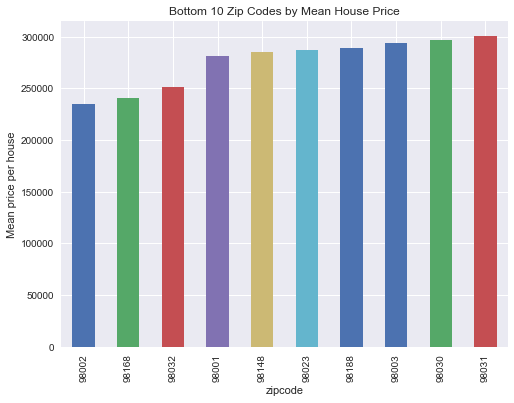

In [99]:
bottom_10_zips_mean = df_location.groupby('zipcode')['price'].mean().sort_values(ascending=True)[:10]
bottom_10_zips_mean.plot(kind='bar', figsize=(8,6))
plt.ylabel("Mean price per house")
plt.title("Bottom 10 Zip Codes by Mean House Price")
plt.show()

These charts show the wide variance in price when looking at house sales by zip code. The mean sales prices for the top 10 are all over 750,000 dollars while the bottom 10 zip codes generally average between 200 and 300 thousand dollars.

**Next let's look at the top 10 zip codes for price of homes with respect to lot size.**

In [100]:
df_location['price per sqft_lot'] = df.price / df.sqft_lot
df_location['price per sqft_lot'].describe()

count    21546.000000
mean        88.710907
std         93.906298
min          0.163119
25%         33.321116
50%         59.089630
75%        107.085119
max       2019.704433
Name: price per sqft_lot, dtype: float64

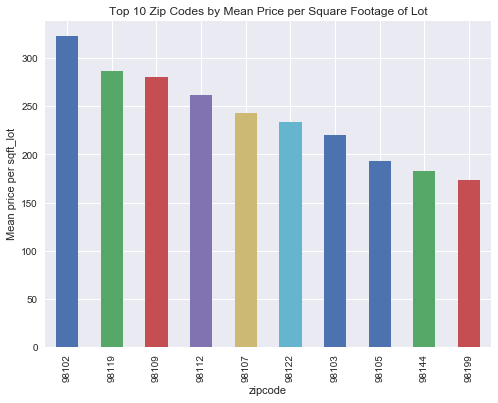

In [101]:
top_10_zip_per_sqft_lot = df_location.groupby('zipcode')['price per sqft_lot'].mean().sort_values(ascending=False)[:10]
top_10_zip_per_sqft_lot.plot(kind='bar', figsize=(8,6))
plt.ylabel('Mean price per sqft_lot')
plt.title('Top 10 Zip Codes by Mean Price per Square Footage of Lot')
plt.show()

The following zip codes appear in both lists: 98102, 98105, 98109, 98112, 98119.  These will be areas with very expensize houses or apartments with a high cost of the house and high cost per square foot of the lot.  Looking at a map they are sure to be very desirable areas of Seattle.   The zip codes which appear in the Top 10 of mean sale price but not in the Top 10 of price per square footage would be interesting to look at to see where expensive homes can be found or built on cheaper land, or at least larger plots.

## Transforming Data

Before we tranform any of the data, let us take another look at where we stand.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21546 entries, 0 to 21596
Data columns (total 11 columns):
price          21546 non-null float64
bedrooms       21546 non-null int64
bathrooms      21546 non-null float64
sqft_living    21546 non-null int64
sqft_lot       21546 non-null int64
floors         21546 non-null float64
view           21546 non-null float64
condition      21546 non-null int64
yr_built       21546 non-null int64
zipcode        21546 non-null object
basement       21546 non-null object
dtypes: float64(4), int64(5), object(2)
memory usage: 2.6+ MB


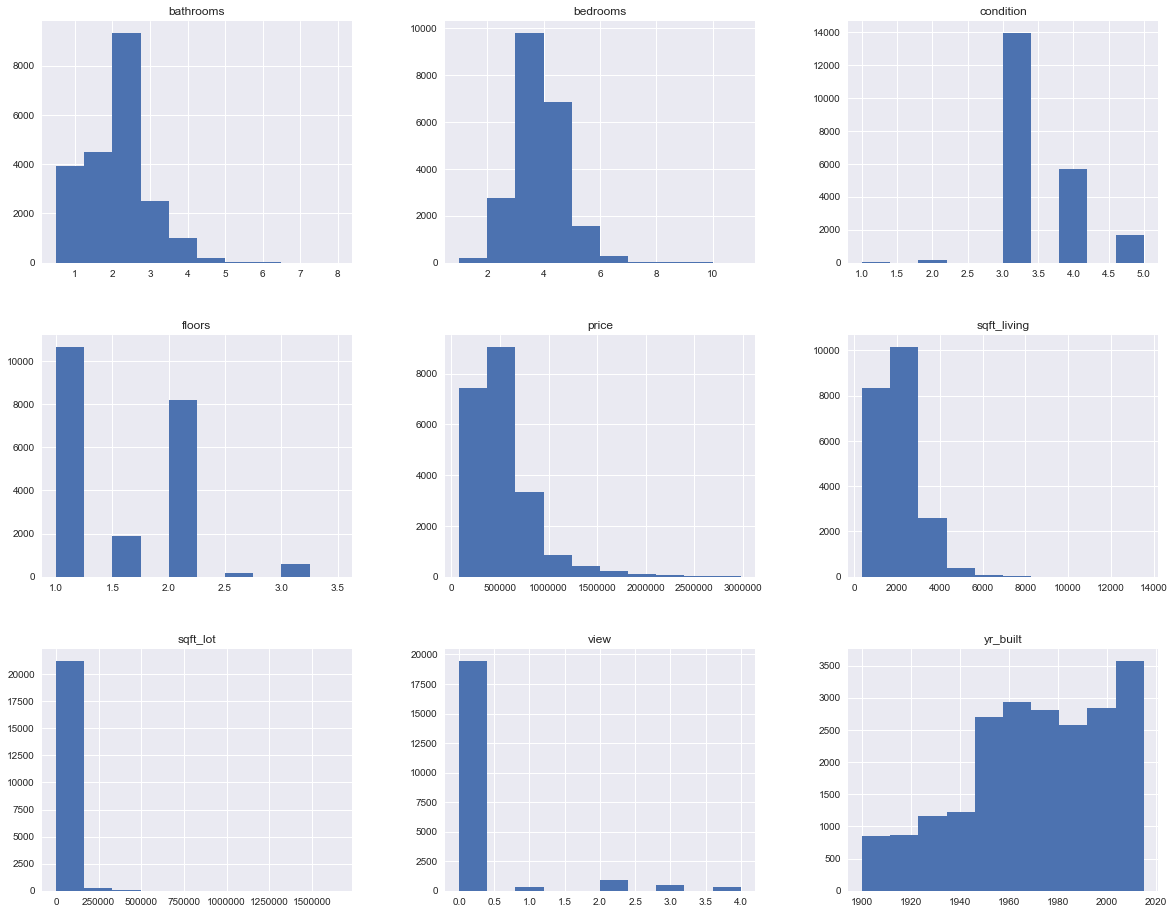

In [103]:
df.hist(figsize = (20,16))
plt.show()

**We will log scale price, bathrooms, bedrooms, floors, sqft_living, sqft_lot and yr_built.**

In [104]:
#Making a copy of the dataframe to perform these transformations on
df_log = df.copy()

#Log transform continuous numerical columns
for col in ['price', 'bathrooms', 'bedrooms', 'floors', 'sqft_living', 'sqft_lot', 'yr_built']:
    df_log[col] = np.log(df[col])

**Next we will transform our categorical variables.**

In [105]:
#Categorizing other variables

df_log['view'] = df_log['view'].astype('int').astype('category')
df_log['condition'] = df_log['condition'].astype('int').astype('category')
df_log['zipcode'] = df_log['zipcode'].astype('category')
df_log['basement'] = df_log['basement'].astype('int').astype('category')

In [106]:
#Previewing our transformed dataset.
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_built,zipcode,basement
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,0,3,7.578145,98178,0
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,0,3,7.576097,98125,1
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,0,3,7.566828,98028,0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,0,5,7.583248,98136,1
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0,3,7.594381,98074,0


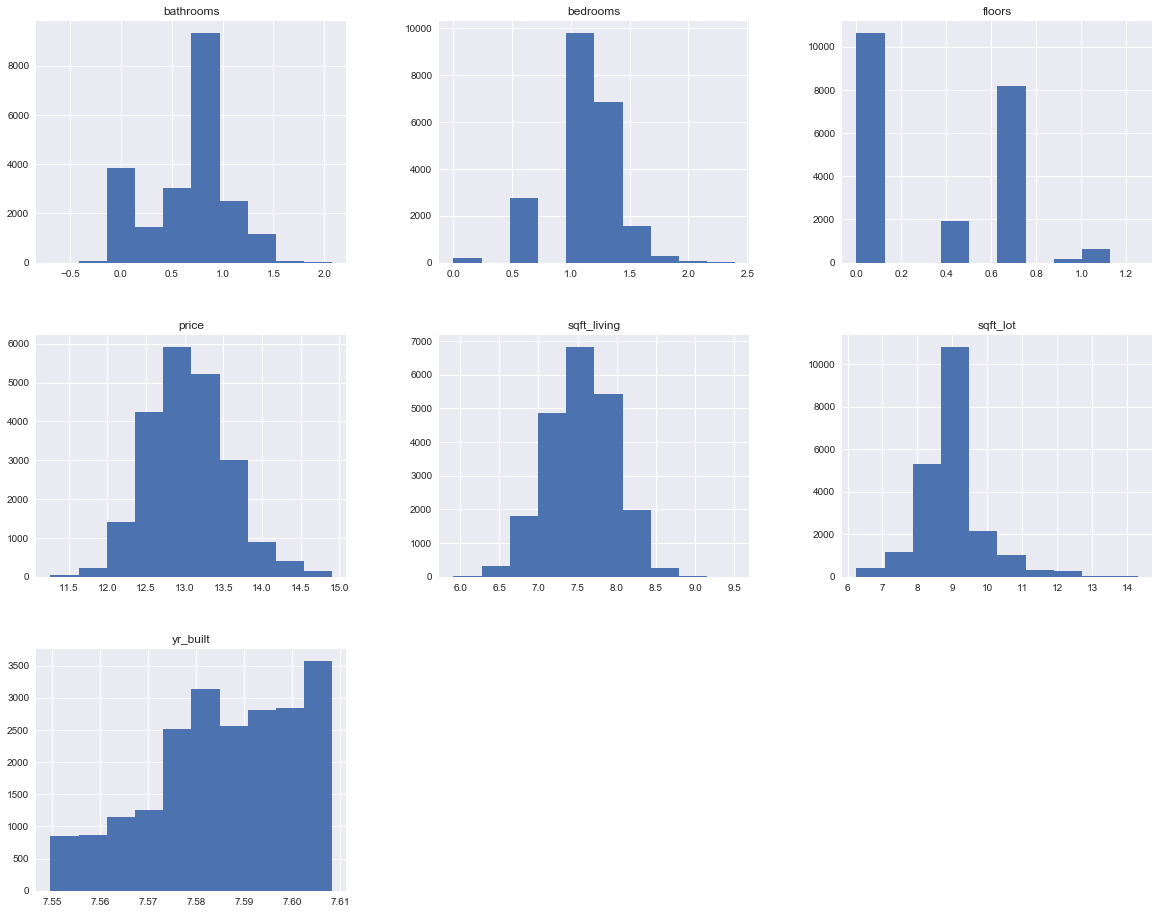

In [107]:
df_log.hist(figsize = (20,16))
plt.show()

Several of our features show a more normal distribution now.  Next we will one-hot encode our categorical variables to prepare the dataset for modeling.

In [108]:
df_final = pd.get_dummies(df_log, drop_first=True)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,view_1,view_2,view_3,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,basement_1
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,7.578145,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,7.576097,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,7.566828,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,7.583248,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,7.594381,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Modeling Our Data
In this step we take our dataset after all of the work in the preceding steps and run Muliple Linear Regression models on it to predict and interpret how our various features affect the sale price of houses in King County.

In [120]:
y = df_final[['price']]
x = df_final.drop(['price'], axis = 1)
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1500.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:37:37   Log-Likelihood:                 4393.0
No. Observations:               21546   AIC:                            -8616.
Df Residuals:                   21461   BIC:                            -7938.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2229      1.116     -0.200      0.842      -2.411       1.965
bedrooms         -0.1122      0.007    -17.106      0.000      -0.125      -0.099
bathrooms         0.0704      0.006     11.091      0.000       0.058       0.083
sqft_living       0.6432      0.007     96.951      0.000       0.630       0.656
sqft_lot          0.0786      0.002     35.050      0.000       0.074       0.083
floors            0.0390      0.006      6.573      0.000       0.027       0.051
yr_built          0.9118      0.146      6.228      0.000       0.625       1.199
view_1            0.1465      0.011     13.029      0.000       0.124       0.169
view_2            0.1523      0.007     22.382      0.000       0.139       0.166
view_3            0.2550      0.009     27.592      0.000       0.237       0.273
view_4            0.5222      0.012     43.219      0.000       0.499       0.546
condition_2       0.1728      0.040      4.335      0.000       0.095       0.251
condition_3       0.3224      0.037      8.714      0.000       0.250       0.395
condition_4       0.3412      0.037      9.221      0.000       0.269       0.414
condition_5       0.3993      0.037     10.726      0.000       0.326       0.472
zipcode_98002    -0.0192      0.018     -1.095      0.274      -0.054       0.015
zipcode_98003     0.0511      0.016      3.240      0.001       0.020       0.082
zipcode_98004     1.2357      0.016     79.711      0.000       1.205       1.266
zipcode_98005     0.8407      0.019     45.293      0.000       0.804       0.877
zipcode_98006     0.7575      0.014     54.859      0.000       0.730       0.785
zipcode_98007     0.7319      0.020     37.175      0.000       0.693       0.770
zipcode_98008     0.7079      0.016     44.636      0.000       0.677       0.739
zipcode_98010     0.2271      0.022     10.123      0.000       0.183       0.271
zipcode_98011     0.4864      0.018     27.628      0.000       0.452       0.521
zipcode_98014     0.2617      0.021     12.592      0.000       0.221       0.302
zipcode_98019     0.2994      0.018     16.840      0.000       0.265       0.334
zipcode_98022     0.0270      0.017      1.613      0.107      -0.006       0.060
zipcode_98023     0.0203      0.014      1.480      0.139      -0.007       0.047
zipcode_98024     0.4162      0.025     16.894      0.000       0.368       0.464
zipcode_98027     0.5752      0.014     40.169      0.000       0.547       0.603
zipcode_98028     0.4453      0.016     28.320      0.000       0.414       0.476
zipcode_98029     0.6818      0.015     44.574      0.000       0.652       0.712
zipcode_98030     0.0650      0.016      4.020      0.000       0.033       0.097
zipcode_98031     0.0909      0.016      5.723      0.000       0.060       0.122
zipcode_98032     0.0118      0.021      0.574   

0.854 is a very good r-squared performance for our model, showing that ~85% of the variability of the target price can be explained by the features making up the model.  A few of the zipcode dummy variables have p-values greater than 0.05 and should be removed as predictors.  

Next we will perform Stepwise Selection on our data which will choose the most appropriate features to use for our model.  

In [110]:
#Code from Flariron curriculum
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [111]:
result = stepwise_selection(x, y, verbose = True)
print("resulting features:")
print(result)

Add  bathrooms                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98004                  with p-value 4.03311e-217
Add  bedrooms                       with p-value 4.99362e-199
Add  zipcode_98023                  with p-value 8.86351e-192
Add  zipcode_98042                  with p-value 3.49478e-135
Add  floors                         with p-value 1.00377e-126
Add  zipcode_98040                  with p-value 5.03577e-130
Add  view_4                         with p-value 4.14142e-113
Add  zipcode_98033                  with p-value 6.0309e-114
Add  zipcode_98092                  with p-value 9.81546e-109
Add  zipcode_98038                  with p-value 3.61138e-113
Add  zipcode_98002                  with p-value 6.22296e-118
Add  zipcode_98168                  with p-value 7.06844e-123
Add  zipcode_98003                  with p-value 1.00944e-123
Add  zipcode_98030                  

In [112]:
len(result)

77

After performing Stepwise Selection we are left with 77 features remaining of the 84 we used in the first model.  Now we will run the OLS regression again with this set of features so that none of our features have a p-value greater than 0.05

In [121]:
x = df_final[result]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1632.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:38:01   Log-Likelihood:                 4363.5
No. Observations:               21546   AIC:                            -8571.
Df Residuals:                   21468   BIC:                            -7949.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1372      1.109      0.124      0.902      -2.036       2.311
bathrooms         0.0703      0.006     11.078      0.000       0.058       0.083
sqft_living       0.6430      0.007     96.808      0.000       0.630       0.656
zipcode_98004     1.1692      0.012     96.045      0.000       1.145       1.193
bedrooms         -0.1122      0.007    -17.095      0.000      -0.125      -0.099
zipcode_98023    -0.0463      0.010     -4.741      0.000      -0.065      -0.027
floors            0.0391      0.006      6.595      0.000       0.028       0.051
zipcode_98040     0.9562      0.013     74.739      0.000       0.931       0.981
view_4            0.5229      0.012     43.288      0.000       0.499       0.547
zipcode_98033     0.7934      0.010     76.161      0.000       0.773       0.814
zipcode_98092    -0.0228      0.011     -2.004      0.045      -0.045      -0.001
zipcode_98038     0.1012      0.009     10.997      0.000       0.083       0.119
zipcode_98002    -0.0860      0.015     -5.868      0.000      -0.115      -0.057
zipcode_98112     1.1507      0.014     85.210      0.000       1.124       1.177
zipcode_98022    -0.0393      0.014     -2.856      0.004      -0.066      -0.012
zipcode_98032    -0.0550      0.018     -3.023      0.003      -0.091      -0.019
zipcode_98039     1.3864      0.031     45.327      0.000       1.326       1.446
view_3            0.2556      0.009     27.666      0.000       0.238       0.274
view_2            0.1524      0.007     22.393      0.000       0.139       0.166
zipcode_98105     1.0195      0.014     71.363      0.000       0.991       1.047
zipcode_98199     0.9178      0.012     74.710      0.000       0.894       0.942
zipcode_98115     0.8353      0.010     86.898      0.000       0.816       0.854
zipcode_98119     1.0509      0.016     66.430      0.000       1.020       1.082
zipcode_98103     0.8531      0.010     87.328      0.000       0.834       0.872
zipcode_98117     0.8349      0.010     84.627      0.000       0.816       0.854
zipcode_98006     0.6910      0.010     69.600      0.000       0.672       0.711
zipcode_98107     0.8852      0.013     66.435      0.000       0.859       0.911
zipcode_98109     1.0686      0.020     53.497      0.000       1.029       1.108
zipcode_98122     0.8783      0.013     67.633      0.000       0.853       0.904
zipcode_98102     1.0741      0.020     52.528      0.000       1.034       1.114
sqft_lot          0.0782      0.002     34.875      0.000       0.074       0.083
zipcode_98116     0.7758      0.012     64.227      0.000       0.752       0.799
zipcode_98052     0.6465      0.009     69.802      0.000       0.628       0.665
zipcode_98005     0.7743      0.016     48.679      0.000       0.743       0.805
zipcode_98144     0.7026      0.012     58.523   

To evaluate our model, we will compare predicted values with actual values.  First we will use sklearn's train-test-split to split our data into training and testing data than run a Linear Regression on the training data. We will use 75% of the data to train the model and hold the other 25% for testing. Then we can compare the Mean Squared Error for the two data sets to be sure our data is not over-fitted.

In [114]:
X = df_final[result]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16159 5387 16159 5387


In [115]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('R-squared:', r2_score(y_test, y_hat_test))
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

R-squared: 0.8486032287989315
Train Mean Squared Error: 0.039201491498946466
Test Mean Squared Error: 0.03879709333234285


The R-squared value from this Linear Regression matches up with the one from statsmodels above.  MSE is similar for both the training and testing data, which we will confirm with cross validation below.

In [116]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_15_results = np.mean(cross_val_score(linreg, X, y, cv=15, scoring="neg_mean_squared_error"))
print(cv_5_results)
print(cv_10_results)
print(cv_15_results)

-0.03970477817484483
-0.03970342884299958
-0.03953527284250883


MSE values are incredibly similar after cross validation.

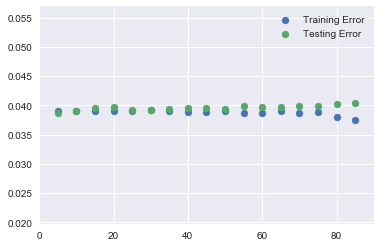

In [117]:
train_err = []
test_err = []
t_sizes = list(range(5,90,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()
plt.show()


We ran the model with 20 different random train/test splits for each split size from 95/5 to 15/85 and plotted the average mean squared error for each split.  The scores are similar and only start to diverge a bit above a 60% test size.

## Step 5: Interpret

Our model acheived an r-squared score of 0.854 meaning that ~85% of the variability in price can be accounted for with the predictor variables in our model.  Now we will look at the coefficients for all of those variables.

In [128]:
# Producing a list of variables sorted by their absolute coefficient value, most impactful at the top
pd.set_option('display.max_rows', 100)
model_coefficients = pd.DataFrame(model.params)
model_coefficients.rename(columns={0:'coefficient'}, inplace=True)
model_coefficients.iloc[(-np.abs(model_coefficients['coefficient'].values)).argsort()]

,coefficient
zipcode_98039,1.386414
zipcode_98004,1.169175
zipcode_98112,1.150721
zipcode_98102,1.074068
zipcode_98109,1.068631
zipcode_98119,1.050883
zipcode_98105,1.019460
zipcode_98040,0.956239
zipcode_98199,0.917794
zipcode_98107,0.885229


The coefficients can be interpreted as the change in log of price for each unit increase in the variable (log transformed for the continuous variables).  The expensive zip codes show at the top along with year built, square foot living space is the first of what we would consider normal attributes of the house, lower down the list is the condition, bathrooms, bedrooms, lot size, etc.

Not surprisingly, location and size are the dominant factors on housing price.  Further study could certainly be warranted to cluster these houses by zip code, or using the longitude and latitude features we dropped from the dataset.  It would be interesting to look at houses within the same geographic location and model those, to further break down what really matters to the size of the house.  But from our analysis, bigger homes in wealthier zip codes are what drives the sales price.   

It would also be worth looking at a larger data set scaling more time, when there would be more data points of renovated houses and could really dig into the value of those renovations and how renovation budget is best spent.

In the below cells, I ran the model without log transforming the target 'price' or any of the other continuous/numeric variables just for comparison.  This model achieves an r-squared value of 0.799.   That is a pretty good score as well, but obviously we acheived better when log tranforming those variables.

In [ ]:
df2 = df.copy()

df2['view'] = df2['view'].astype('int').astype('category')
df2['condition'] = df2['condition'].astype('int').astype('category')
df2['zipcode'] = df2['zipcode'].astype('category')
df2['basement'] = df2['basement'].astype('int').astype('category')

df2 = pd.get_dummies(df2, drop_first=True)

In [ ]:
y = df2['price']
x = df2.drop(['price'], axis = 1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

In [ ]:
df5= df[df.sqft_living < 10000]
df5.head()
df5.info()

In [ ]:

sns.lmplot(x='sqft_living', y='price', data=df5, height=4, aspect=3, line_kws={'color':'red'})
plt.title('Square Footage of Living Space vs. Price')
plt.show()